In [13]:
import os
import numpy
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as mpl
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
%matplotlib inline 

In [ ]:
!unzip letters.zip

In [15]:
BATCH_SIZE = 256
IMAGE_SIZE = (145,145)

In [16]:
train_dataset = image_dataset_from_directory('letters/letters_train/',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 15136 files belonging to 32 classes.
Using 13623 files for training.


In [17]:
validation_dataset = image_dataset_from_directory('letters/letters_train/',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 15136 files belonging to 32 classes.
Using 1513 files for validation.


In [18]:
test_dataset = image_dataset_from_directory('letters/letters_test/',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 19 files belonging to 8 classes.


In [19]:
class_names = train_dataset.class_names
class_names

['а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я']

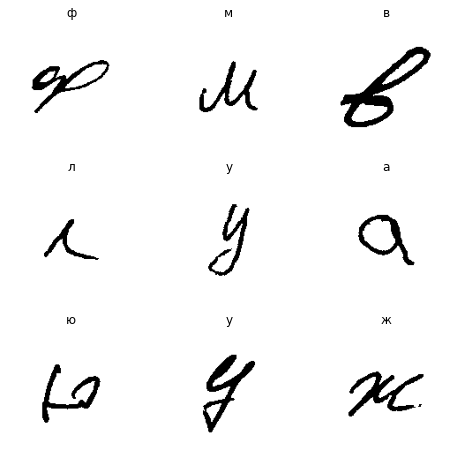

In [20]:
mpl.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = mpl.subplot(3, 3, i + 1)
    mpl.imshow(images[i].numpy().astype("uint8"))
    mpl.title(class_names[labels[i]])
    mpl.axis("off")

In [21]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [22]:
model = Sequential()
model.add(Conv2D(16, (5, 5), padding='same', input_shape=(145, 145, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(32, activation='softmax'))

In [23]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [24]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=1)

Epoch 1/5
54/54 [==============================] - 717s 13s/step - loss: 5.5375 - accuracy: 0.3126 - val_loss: 0.8353 - val_accuracy: 0.7621
Epoch 2/5
54/54 [==============================] - 713s 13s/step - loss: 0.7170 - accuracy: 0.7802 - val_loss: 0.3845 - val_accuracy: 0.8797
Epoch 3/5
54/54 [==============================] - 712s 13s/step - loss: 0.3730 - accuracy: 0.8858 - val_loss: 0.3138 - val_accuracy: 0.9088
Epoch 4/5
54/54 [==============================] - 711s 13s/step - loss: 0.2627 - accuracy: 0.9192 - val_loss: 0.2848 - val_accuracy: 0.9213
Epoch 5/5
54/54 [==============================] - 709s 13s/step - loss: 0.1796 - accuracy: 0.9449 - val_loss: 0.2472 - val_accuracy: 0.9352


In [25]:
scores = model.evaluate(test_dataset, verbose=1)

1/1 [==============================] - 0s 295ms/step - loss: 4.9851 - accuracy: 0.1579


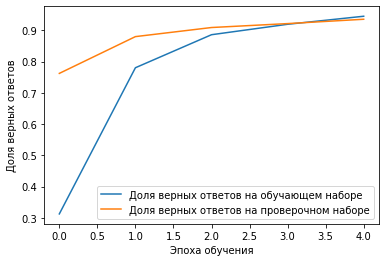

In [26]:
mpl.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
mpl.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
mpl.xlabel('Эпоха обучения')
mpl.ylabel('Доля верных ответов')
mpl.legend()
mpl.show()

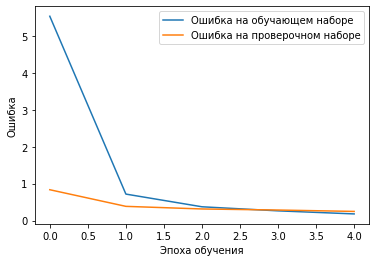

In [27]:
mpl.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
mpl.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
mpl.xlabel('Эпоха обучения')
mpl.ylabel('Ошибка')
mpl.legend()
mpl.show()

1/1 [==============================] - 0s 38ms/step


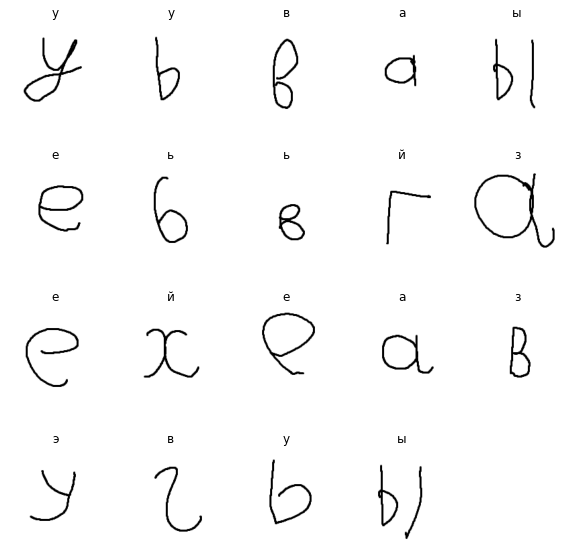

In [28]:
images_test = os.listdir('/content/letters/letters_test2/')

mpl.figure(figsize=(10, 10))
for i in range(19):
  ax = mpl.subplot(4, 5, i + 1)

  img = tf.keras.utils.load_img('/content/letters/letters_test2/'+images_test[i], target_size=(145, 145))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions)

  mpl.imshow(img)
  mpl.title(class_names[numpy.argmax(score)])
  mpl.axis("off")

In [31]:
model.save("letters.h5")